# EDA: Exploratory Data Analysis

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [1]:
#!pip install skimpy

# Cargar  librerías

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from skimpy import skim
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

## Importar los datos

In [3]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.shape

(201, 29)

## Vista general

In [6]:
# Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [7]:
# Los valores nulos del dataframe
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [8]:
# Cuáles son los tipos de datos que tenemos?
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [9]:
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [10]:
# Mostrar filas duplicadas
df.duplicated().sum()

0

In [15]:
df

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,horsepower_binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


# **Estadística descriptiva**

La **estadística descriptiva** permite explorar los datos con el propósito de hallar sus características principales, mediante la implementación de gráficas y el cálculo de algunas variables estadísticas. Para este fin, en Python se puede hacer uso de las herramientas:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

Algunos conceptos que se deben tener claros al trabajar en estadística son los de media, mediana, moda, desviación estandar, percentles entre otros. 

#### Media y desviación estandar
La media es una de las principales medidas de tendencia central y representa una suma ponderada de los valores bajo estudio. La desviación estandar es una de las principales medidas de dispersión e indica qué tan esparcidos están los datos respecto a la media. 

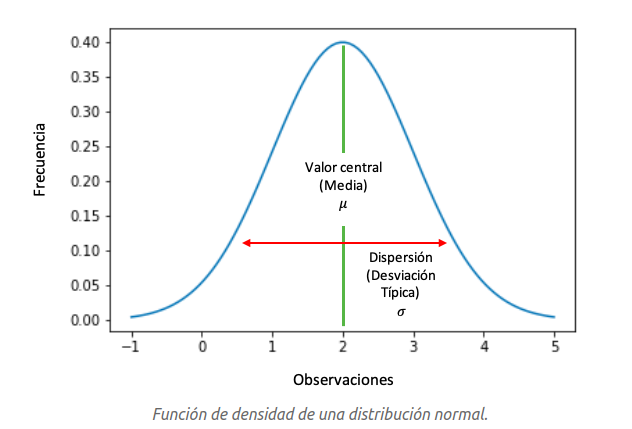
https://economipedia.com/definiciones/distribucion-normal.html

La media, mediana y la moda son medidas de tendencia central y se pueden comparar como sigue:

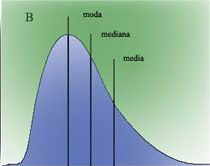
https://it.wikipedia.org/wiki/Mediana_%28statistica%29

#### Percentiles
El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo. 

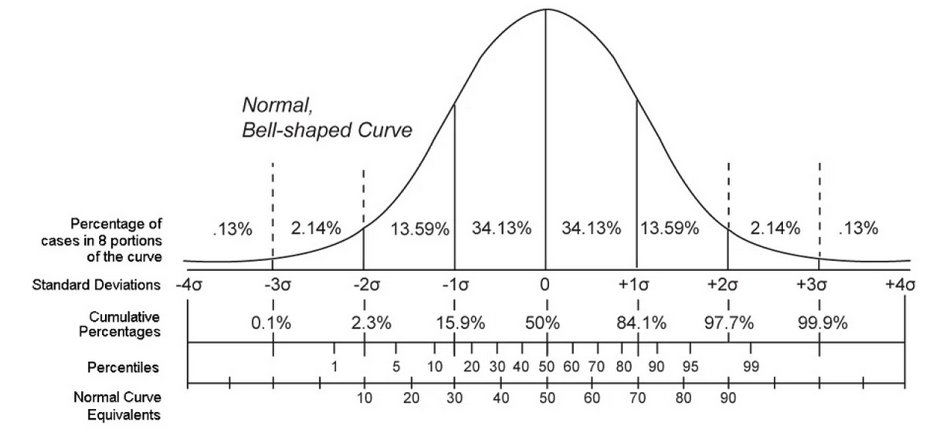
https://psicologiaymente.com/miscelanea/como-calcular-percentiles


#### Metodos .describe() y .value_counts()

In [19]:
# Obtener las columnas de tipo numérico
#df._get_numeric_data().dtypes.index
df.select_dtypes(include=[int, float]).columns

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'city_L/100km', 'diesel', 'gas'],
      dtype='object')

In [30]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

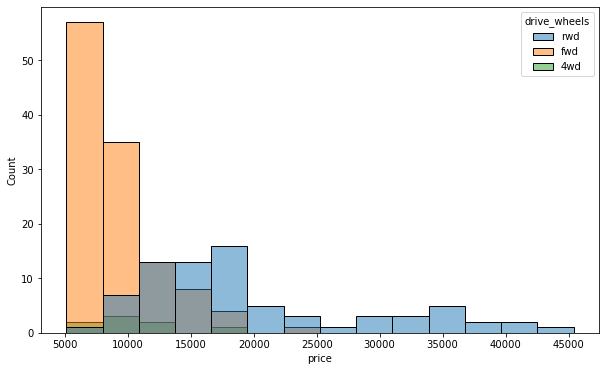

In [23]:
fig, ax = plt.subplots(figsize=(10,6)) 
sbn.histplot(data=df, x='price', hue='drive_wheels', ax=ax)

<AxesSubplot:xlabel='drive_wheels', ylabel='price'>

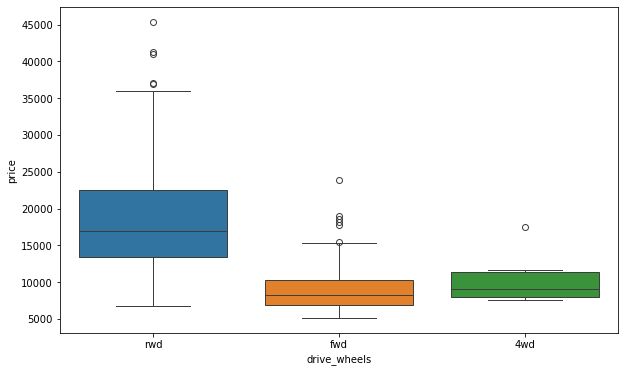

In [24]:
fig, ax = plt.subplots(figsize=(10,6)) 
sbn.boxplot(data=df, x='drive_wheels', y='price', hue="drive_wheels", ax=ax)

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

In [26]:
# Carros con cada tipo de tracción
df.drive_wheels.value_counts()

drive_wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [28]:
# Medianas de los precios según el tipo de tracción
df.groupby("drive_wheels").median(numeric_only=True).price

drive_wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

In [31]:
#skim(df)
#!pip install skimpy

Qué variable se puede utilizar mejor para predecir el precio de un carro, engine_location o body_style? 

<AxesSubplot:xlabel='body_style', ylabel='price'>

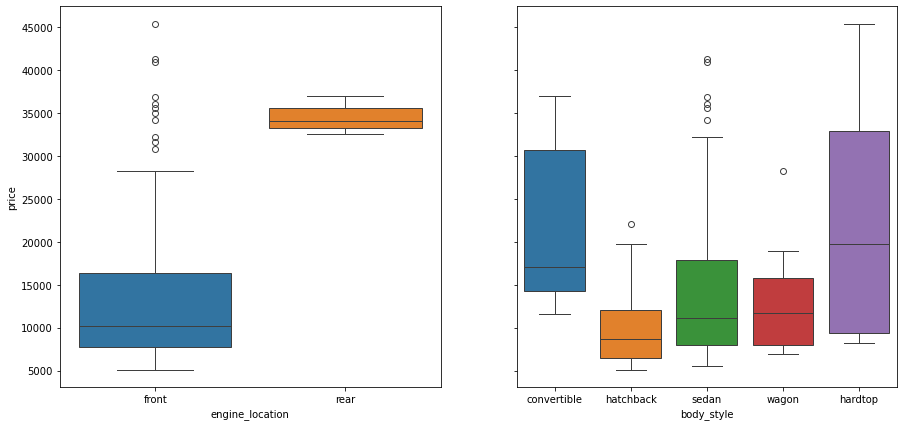

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(15,7))

sbn.boxplot(data=df, x="engine_location", y="price", hue="engine_location", ax=ax[0])
sbn.boxplot(data=df, x="body_style",      y="price", hue="body_style", ax=ax[1])

Qué tan bien puede predecir el precio la marca del carro?

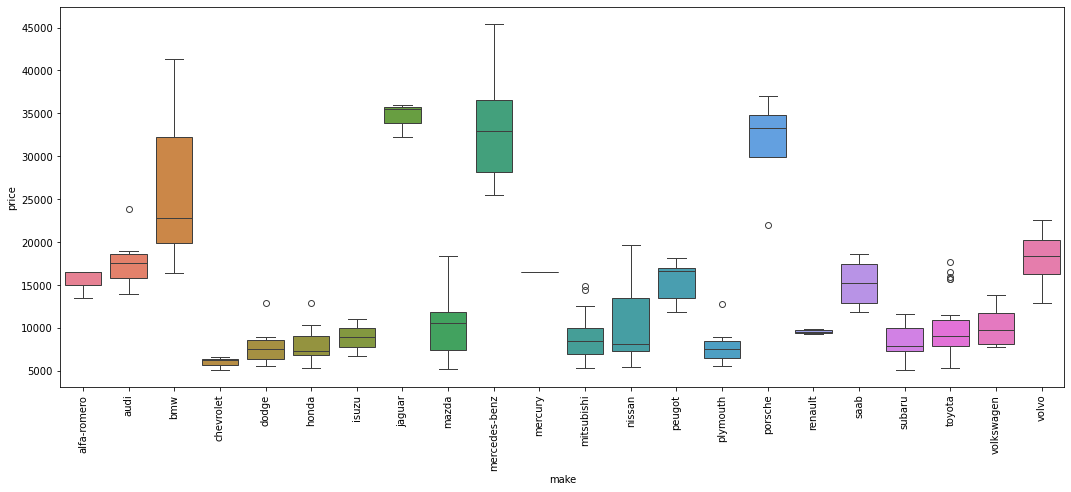

In [19]:
fig, ax = plt.subplots(figsize=(18,7))
sbn.boxplot(data=df, x="make", y="price", hue="make")
plt.xticks(rotation=90)
plt.show()

No solo se tienen que utilizar las variables de tipo categórico para tratar de hacer prediccones como se ha intentado arriba. Las variables numéricas, como engine_size también pueden ayudar a realizar predicciones sobre el precio de los carros. 

Cuando se utilizan dos o más variables de tipo numérico un gráfico que es bastante útil es de dispersión.

#### Scatter plots

Dentro de nuestros datos podemos tener en varias ocasiones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine_size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable diana o blanco: "price".</li>
    <li>Variable predictora: "engine_size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine_size".


<AxesSubplot:xlabel='horsepower', ylabel='price'>

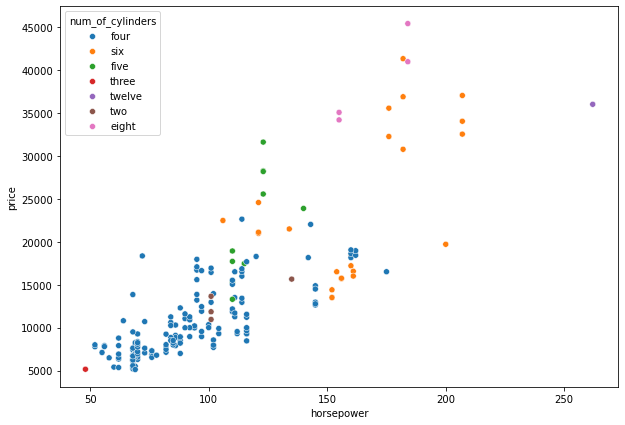

In [37]:
fig, ax = plt.subplots(figsize=(10,7))

select_col = 'horsepower' 
sbn.scatterplot(data=df, x=select_col, y="price", hue="num_of_cylinders", ax=ax)

In [38]:
#df.select_dtypes([int, float])

In [21]:
#Ejercicio
#Qué otras variables predictoras podrían utilizarse para el precio?

# Groupby y Heatmaps

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive_wheels"). Podemos observar que tenemos tres tipos de categorias.

In [22]:
df_g1 = df.groupby(['drive_wheels'])
df_g1[["price"]].agg("mean").sort_values(by="price", ascending=False)

,price
drive_wheels,
rwd,19757.613333
4wd,10241.000000
fwd,9244.779661


In [39]:
df.groupby(['drive_wheels']).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive_wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


In [47]:
df_g2 = df.groupby(['drive_wheels','body_style']).mean(numeric_only=True).unstack()
df_g2[["price"]]

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables.

<AxesSubplot:xlabel='None-body_style', ylabel='drive_wheels'>

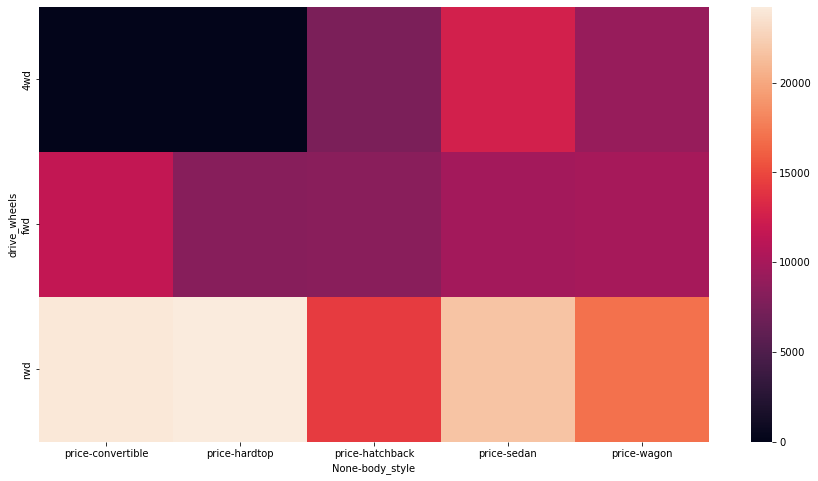

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
sbn.heatmap(data=df_g2[["price"]].fillna(0), ax=ax)

## Correlación 


La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

/tmp/ipykernel_15686/2525571671.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


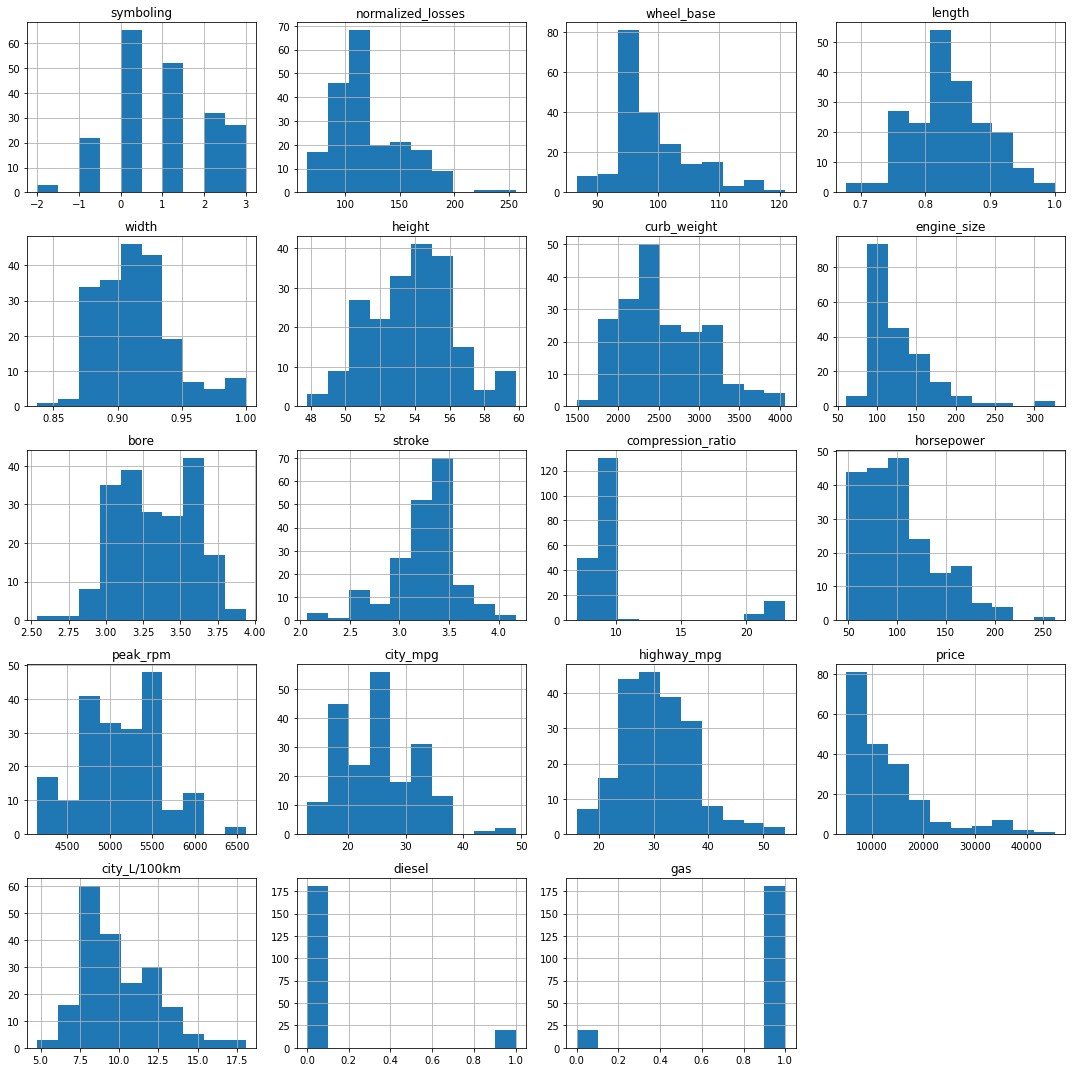

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

In [50]:
df.corr(numeric_only=True, method="kendall")

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
symboling,1.000000,0.375720,-0.413205,-0.296122,-0.177592,-0.418942,-0.179961,-0.144436,-0.142360,-0.002349,0.023644,-0.012184,0.225972,-0.010302,0.038665,-0.104866,0.010302,-0.190877,0.190877
normalized_losses,0.375720,1.000000,-0.045157,0.028482,0.078305,-0.247791,0.079149,0.087686,-0.021958,0.078688,-0.050537,0.158850,0.175705,-0.182678,-0.145752,0.134911,0.182678,-0.080923,0.080923
wheel_base,-0.413205,-0.045157,1.000000,0.746966,0.656894,0.468104,0.609645,0.501344,0.409432,0.142993,-0.102371,0.367888,-0.224587,-0.366512,-0.403542,0.540313,0.366512,0.231086,-0.231086
length,-0.296122,0.028482,0.746966,1.000000,0.725730,0.380968,0.722186,0.599280,0.499211,0.107753,-0.134273,0.478809,-0.185232,-0.500317,-0.524061,0.636420,0.500317,0.159724,-0.159724
width,-0.177592,0.078305,0.656894,0.725730,1.000000,0.271977,0.680153,0.584820,0.446336,0.156687,-0.107198,0.505921,-0.147418,-0.507807,-0.518473,0.638911,0.507807,0.198105,-0.198105
height,-0.418942,-0.247791,0.468104,0.380968,0.271977,1.000000,0.254437,0.161993,0.160424,-0.021545,-0.012685,0.021840,-0.196572,-0.057001,-0.098166,0.182387,0.057001,0.245611,-0.245611
curb_weight,-0.179961,0.079149,0.609645,0.722186,0.680153,0.254437,1.000000,0.720936,0.537937,0.122862,-0.166549,0.619200,-0.167963,-0.644569,-0.670616,0.744265,0.644569,0.161817,-0.161817
engine_size,-0.144436,0.087686,0.501344,0.599280,0.584820,0.161993,0.720936,1.000000,0.532226,0.203609,-0.184297,0.660682,-0.199354,-0.584316,-0.579671,0.661342,0.584316,0.111066,-0.111066
bore,-0.142360,-0.021958,0.409432,0.499211,0.446336,0.160424,0.537937,0.532226,1.000000,-0.059778,-0.137246,0.472928,-0.223067,-0.450015,-0.460463,0.489625,0.450015,0.037211,-0.037211
stroke,-0.002349,0.078688,0.142993,0.107753,0.156687,-0.021545,0.122862,0.203609,-0.059778,1.000000,-0.029412,0.109124,-0.033302,-0.024057,-0.028546,0.094153,0.024057,0.267877,-0.267877


<AxesSubplot:>

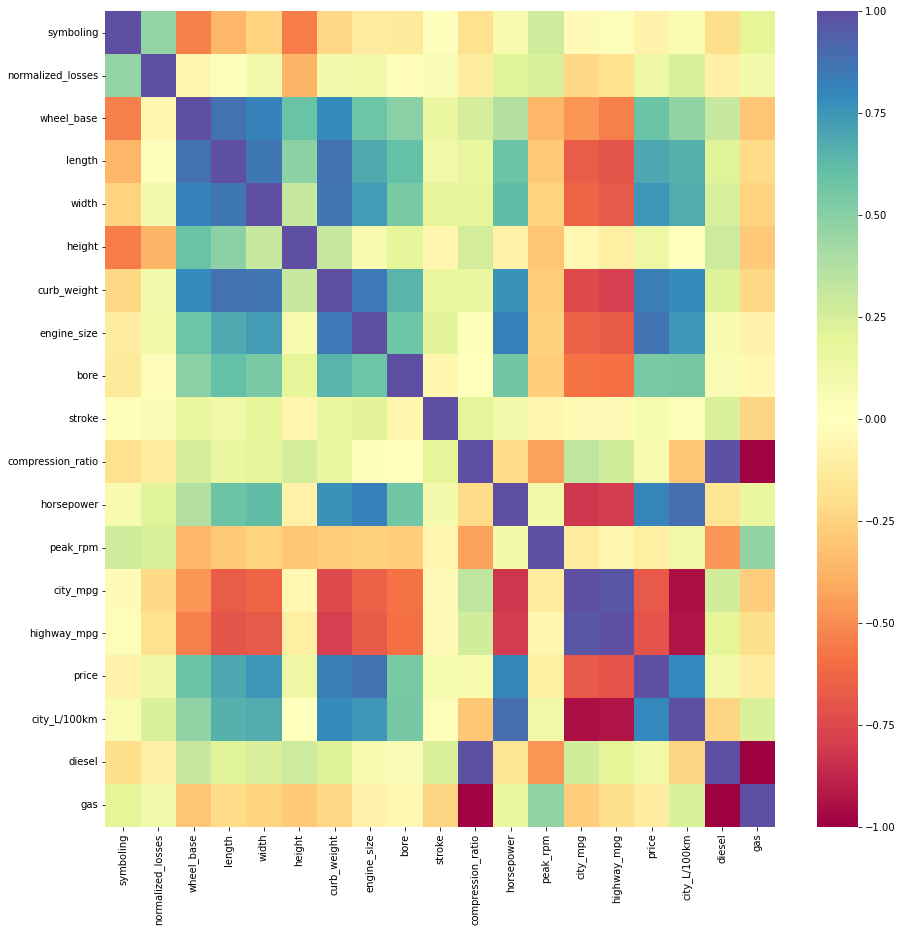

In [28]:
fig, ax = plt.subplots(figsize=(15,15))

sbn.heatmap(df.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap=sbn.color_palette("Spectral", as_cmap=True),
            ax=ax)